<a href="https://colab.research.google.com/github/Samyakjain03112001/PROJECT/blob/main/Webstreaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Problem**

Analyze the data and generate insights that could help Netflix deciding which type of
shows/movies to produce and how they can grow the business in different countries

In [1]:
#Importing the libraries we need.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading The Dataset
nf = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [6]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#**Netflix EDA**

In [7]:
nf.shape

(8807, 12)

In [8]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
type(nf["date_added"][0]) ### type of date_added is in string format, we will change it in datetime format

str

In [10]:
nf["date_added"]=pd.to_datetime(nf["date_added"])

In [11]:
type(nf["date_added"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [13]:
nf.describe(include="all")

<ipython-input-13-38e663682bd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  nf.describe(include="all")


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1714,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,2020-01-01 00:00:00,NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,110,NaN,3207,1793,362,4
first,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN


In [14]:
nf.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [15]:
nf["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [16]:
nf["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

Some mess with rating column we will sort in pre processing there are three "min" values

Missing value check and pre processing the data

In [17]:
nf.isna().sum() #many NaN values in catagorical data points like director, cast, country

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

To fill unknown values

In [18]:
nf.loc[nf["rating"]=="74 min"]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [19]:
nf.loc[nf["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [20]:
nf["duration"]=nf["duration"].fillna(nf["rating"])

In [21]:
nf["rating"][[5541,5794,5813]]=np.nan

<ipython-input-21-ec7ae9361de1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf["rating"][[5541,5794,5813]]=np.nan


In [22]:
nf.isna().sum()  ### duration column is sorted

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [23]:
nf.loc[nf["rating"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [24]:
nf["rating"]=nf["rating"].fillna("unkown_rating")
nf["director"]=nf["director"].fillna("unknown_director")
nf["cast"]=nf["cast"].fillna("unknown_actor")
nf["country"]=nf["country"].fillna("unknown_country")

In [25]:
nf.isna().sum() # All missing values are filled except date_added

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

#**Univariate analysis**

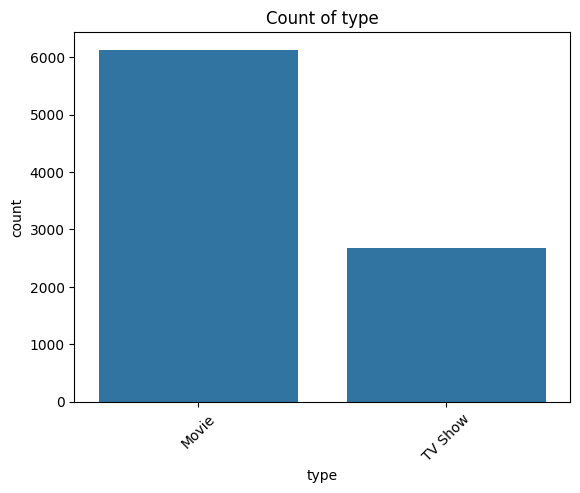

In [26]:
sns.countplot(data=nf,
                 x="type")
plt.xticks(rotation=45)
plt.title("Count of type")
plt.show()

Movies are majorly added in Netflix then TV_show

Relation between type and Rating plot

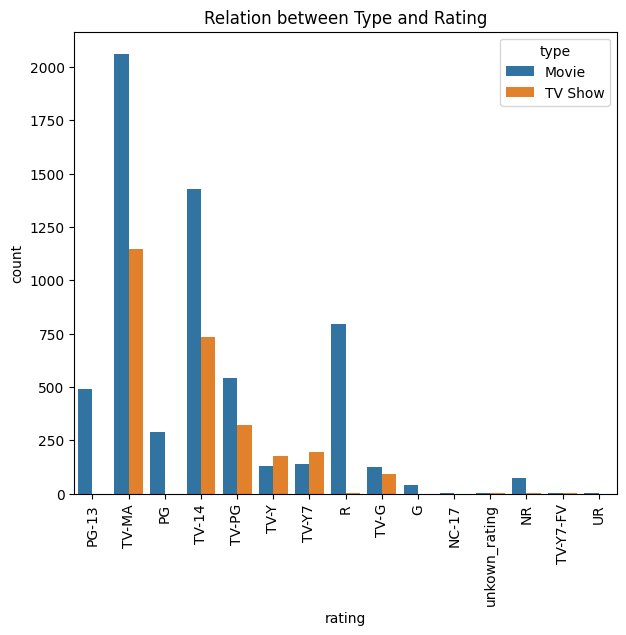

In [27]:
plt.figure(figsize=(7,6))
sns.countplot(x='rating',
            hue='type',
            data=nf)
plt.xticks(rotation=90)
plt.title('Relation between Type and Rating')
plt.show()

Majority of the rating is TV-MA and TV-14

TV-14 - these shows may be unsuitable for children under 14

TV-MA - these programs are intended to be viewed by mature, adult audiences and may be unsuitable for children under 17

Distribution of movies and TV_show

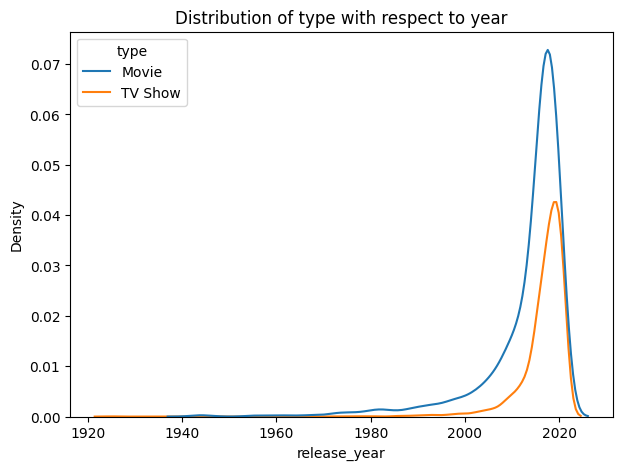

In [28]:
plt.figure(figsize=(7,5))
sns.kdeplot(x='release_year',
            hue='type',
            data=nf)
plt.title("Distribution of type with respect to year")
plt.show()

Majority of the movies are form approx 2008 to 2022 and TV_shows are from approx 2012 to 2022

Un-nesting the columns with multiple values with seperated with comma ", "

In [29]:
nf_dir=nf[["title", "director"]]
nf_dir["director"]=nf_dir["director"].str.split(", ")   ### spliting the columns and using explode
nf_dir=nf_dir.explode("director")

<ipython-input-29-d9ca1f9f5b92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_dir["director"]=nf_dir["director"].str.split(", ")   ### spliting the columns and using explode


In [30]:
nf_c=nf[["title", "cast"]]
nf_c["cast"]=nf_c["cast"].str.split(", ")
nf_c=nf_c.explode("cast")

<ipython-input-30-c1edf982e658>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_c["cast"]=nf_c["cast"].str.split(", ")


In [31]:
nf_li=nf[["title", "listed_in"]]
nf_li["listed_in"]=nf_li["listed_in"].str.split(", ")
nf_li=nf_li.explode("listed_in")

<ipython-input-31-c9ed9c3271a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_li["listed_in"]=nf_li["listed_in"].str.split(", ")


In [32]:
nf_co=nf[["title", "country"]]
nf_co["country"]=nf_co["country"].str.split(", ")
nf_co=nf_co.explode("country")

<ipython-input-32-20c2b577c544>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nf_co["country"]=nf_co["country"].str.split(", ")


Merging the columns after spliting and expanding the columns

In [33]:
nf1=pd.merge(nf,nf_dir, on="title")
nf1=pd.merge(nf1,nf_c, on="title")
nf1=pd.merge(nf1,nf_li, on="title")
nf1=pd.merge(nf1,nf_co, on="title")

In [34]:
nf1.drop(columns=["director_x","cast_x","country_x","listed_in_x"],inplace=True)

In [35]:
nf1.head()

,show_id,type,title,date_added,release_year,rating,duration,description,director_y,cast_y,listed_in_y,country_y
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,unknown_actor,Documentaries,United States
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",unknown_director,Ama Qamata,International TV Shows,South Africa
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",unknown_director,Ama Qamata,TV Dramas,South Africa
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",unknown_director,Ama Qamata,TV Mysteries,South Africa
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",unknown_director,Khosi Ngema,International TV Shows,South Africa


Making two different tables for Movies and TV_shows

In [36]:
movie=nf1.loc[nf1["type"]=="Movie"]
tv=nf1.loc[nf1["type"]=="TV Show"]

#**Top 5 Analysis**

Top 5 country which produce highest movies

In [37]:
movie.groupby(["country_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

country_y
United States      2751
India               962
United Kingdom      532
unknown_country     440
Canada              319
Name: show_id, dtype: int64

In [38]:
aj=movie.groupby(["country_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
i=aj.index
j=aj.values

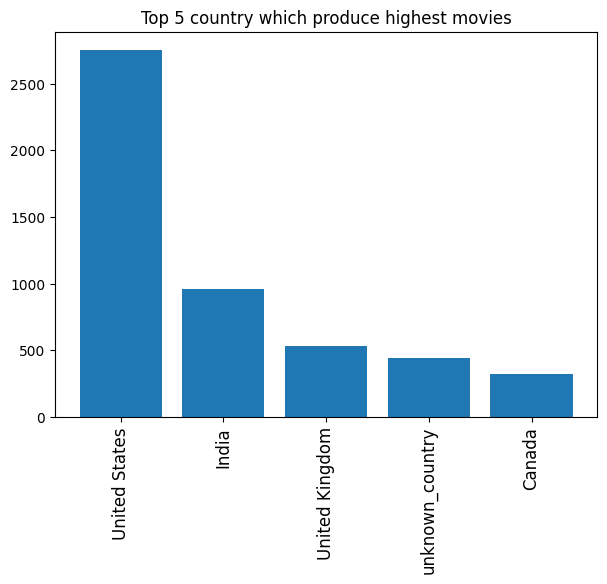

In [39]:
plt.figure(figsize=(7,5))
plt.bar(i, j)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 country which produce highest movies")
plt.show()

Top 5 country which produce highest TV_shows

In [40]:
tv.groupby(["country_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

country_y
United States      938
unknown_country    391
United Kingdom     272
Japan              199
South Korea        170
Name: show_id, dtype: int64

In [41]:
bb=tv.groupby(["country_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
f=bb.index
p=bb.values

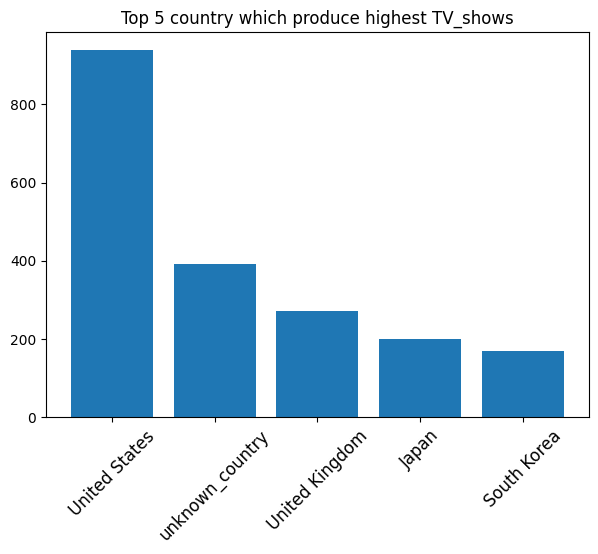

In [42]:
plt.figure(figsize=(7,5))
plt.bar(f, p)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 country which produce highest TV_shows")
plt.show()

Top 5 Genre(listed_in) of Movies

In [43]:
movie.groupby(["listed_in_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

listed_in_y
International Movies    2752
Dramas                  2427
Comedies                1674
Documentaries            869
Action & Adventure       859
Name: show_id, dtype: int64

In [44]:
li=movie.groupby(["listed_in_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
v=li.index
r=li.values

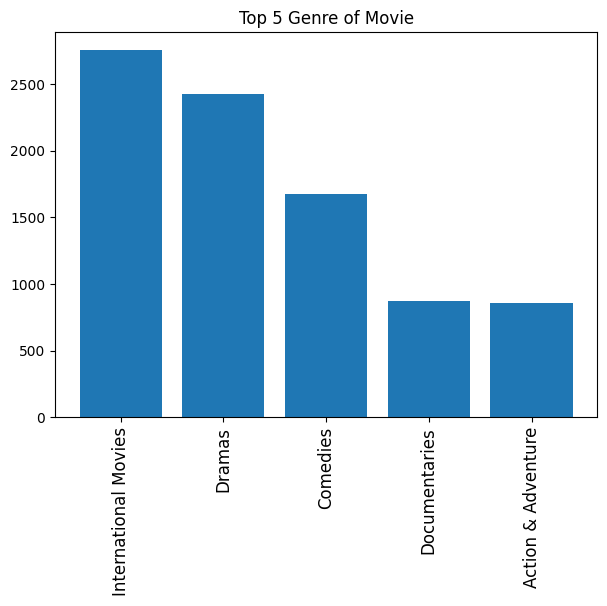

In [45]:
plt.figure(figsize=(7,5))
plt.bar(v, r)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 Genre of Movie")
plt.show()

Top 5 Genre of TV_shows

In [46]:
tv.groupby(["listed_in_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

listed_in_y
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Name: show_id, dtype: int64

In [47]:
bv=tv.groupby(["listed_in_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
ty=bv.index
ui=bv.values

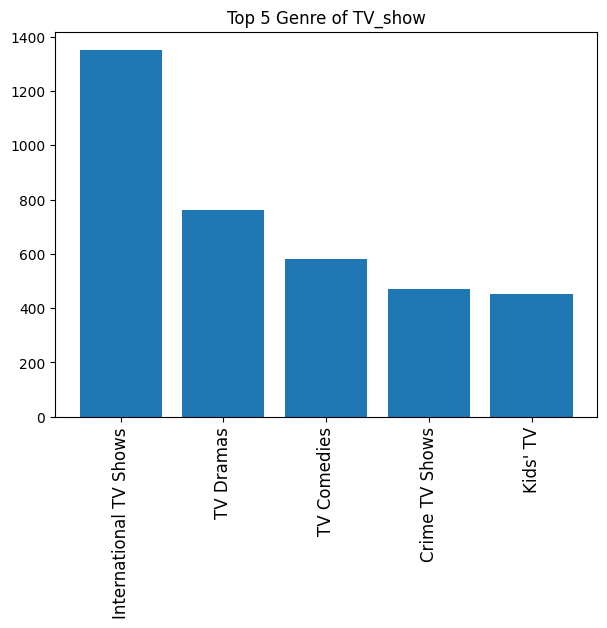

In [48]:
plt.figure(figsize=(7,5))
plt.bar(ty, ui)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 Genre of TV_show")
plt.show()

Top 5 rated movie

In [49]:
movie.groupby(["rating"])["show_id"].nunique().sort_values(ascending=False).head(5)

rating
TV-MA    2062
TV-14    1427
R         797
TV-PG     540
PG-13     490
Name: show_id, dtype: int64

In [50]:
dr=movie.groupby(["rating"])["show_id"].nunique().sort_values(ascending=False).head(5)
o=dr.index
q=dr.values

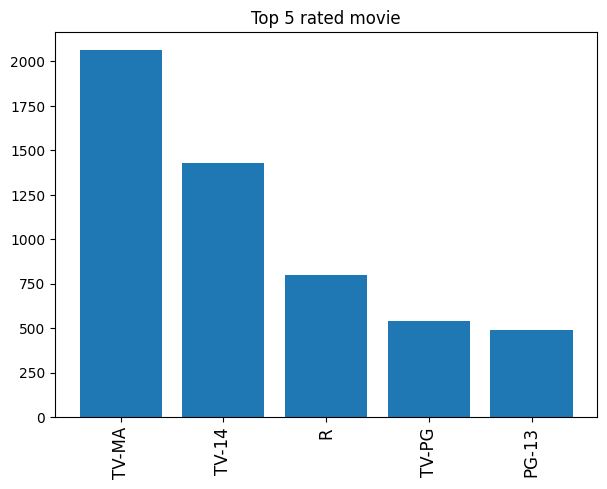

In [51]:
plt.figure(figsize=(7,5))
plt.bar(o, q)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 rated movie")
plt.show()

Top 5 rated TV_show

In [52]:
tv.groupby(["rating"])["show_id"].nunique().sort_values(ascending=False).head(5)

rating
TV-MA    1145
TV-14     733
TV-PG     323
TV-Y7     195
TV-Y      176
Name: show_id, dtype: int64

In [53]:
tt=tv.groupby(["rating"])["show_id"].nunique().sort_values(ascending=False).head(5)
x1=tt.index
x2=tt.values

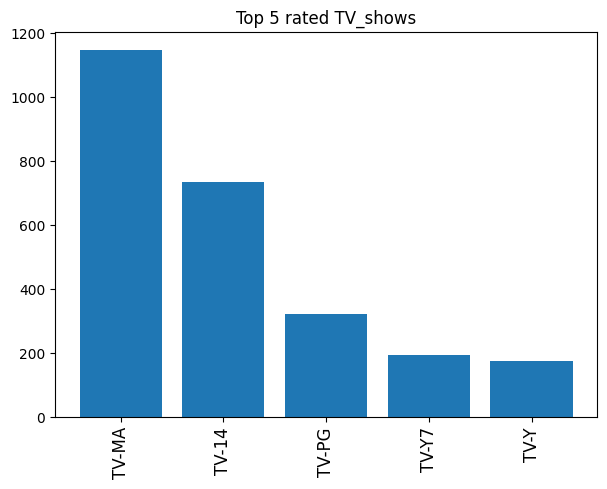

In [54]:
plt.figure(figsize=(7,5))
plt.bar(x1, x2)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 rated TV_shows")
plt.show()

Top 5 producing director for movies

In [55]:
movie.groupby(["director_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

director_y
unknown_director    188
Rajiv Chilaka        22
Jan Suter            21
Raúl Campos          19
Suhas Kadav          16
Name: show_id, dtype: int64

In [56]:
hg=movie.groupby(["director_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
tr=hg.index
ru=hg.values

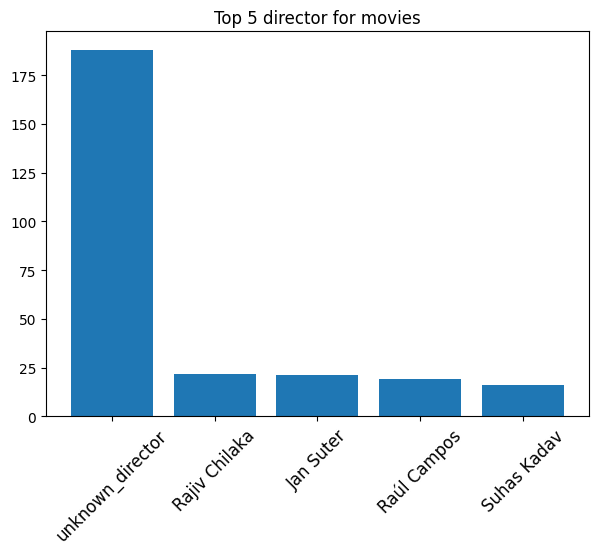

In [57]:
plt.figure(figsize=(7,5))
plt.bar(tr, ru)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 director for movies")
plt.show()

Top 5 producing director for TV_show

In [58]:
tv.groupby(["director_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

director_y
unknown_director       2446
Ken Burns                 3
Alastair Fothergill       3
Jung-ah Im                2
Joe Berlinger             2
Name: show_id, dtype: int64

In [59]:
hg=tv.groupby(["director_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
jr=hg.index
tu=hg.values

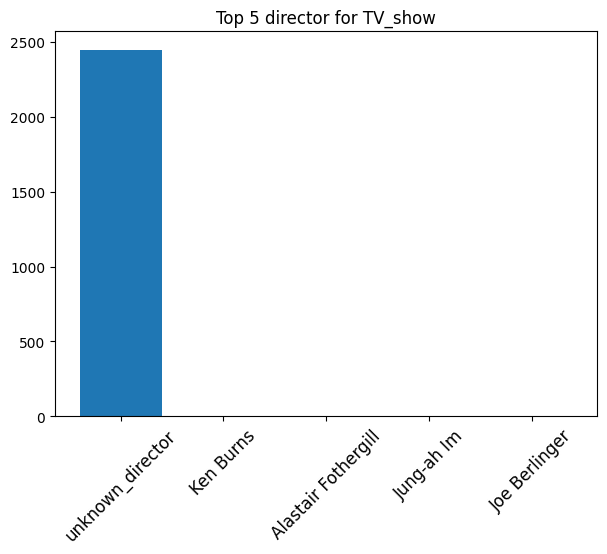

In [60]:
plt.figure(figsize=(7,5))
plt.bar(jr, tu)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 director for TV_show")
plt.show()

Top 5 actor in movies

In [61]:
movie.groupby(["cast_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

cast_y
unknown_actor       475
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     32
Akshay Kumar         30
Name: show_id, dtype: int64

In [62]:
hg=movie.groupby(["cast_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
t1=hg.index
r1=hg.values

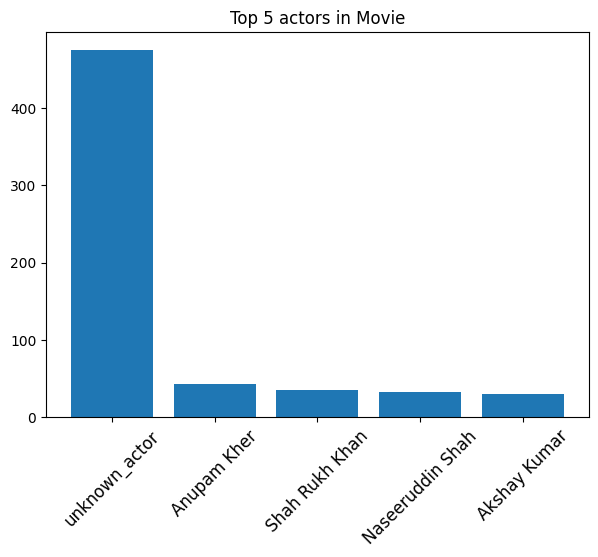

In [63]:
plt.figure(figsize=(7,5))
plt.bar(t1, r1)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 actors in Movie")
plt.show()

Top 5 actors in TV_shows

In [64]:
tv.groupby(["cast_y"])["show_id"].nunique().sort_values(ascending=False).head(5)

cast_y
unknown_actor       350
Takahiro Sakurai     25
Yuki Kaji            19
Daisuke Ono          17
Ai Kayano            17
Name: show_id, dtype: int64

In [65]:
r5=tv.groupby(["cast_y"])["show_id"].nunique().sort_values(ascending=False).head(5)
y7=r5.index
u7=r5.values

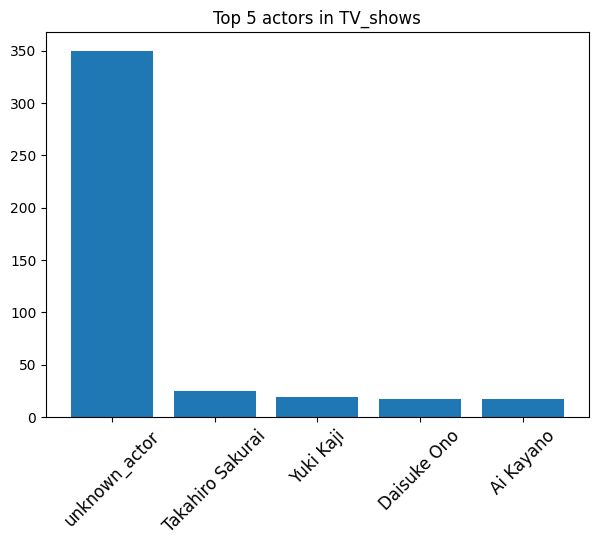

In [66]:
plt.figure(figsize=(7,5))
plt.bar(y7, u7)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 actors in TV_shows")
plt.show()

top 5 in Movie analysis

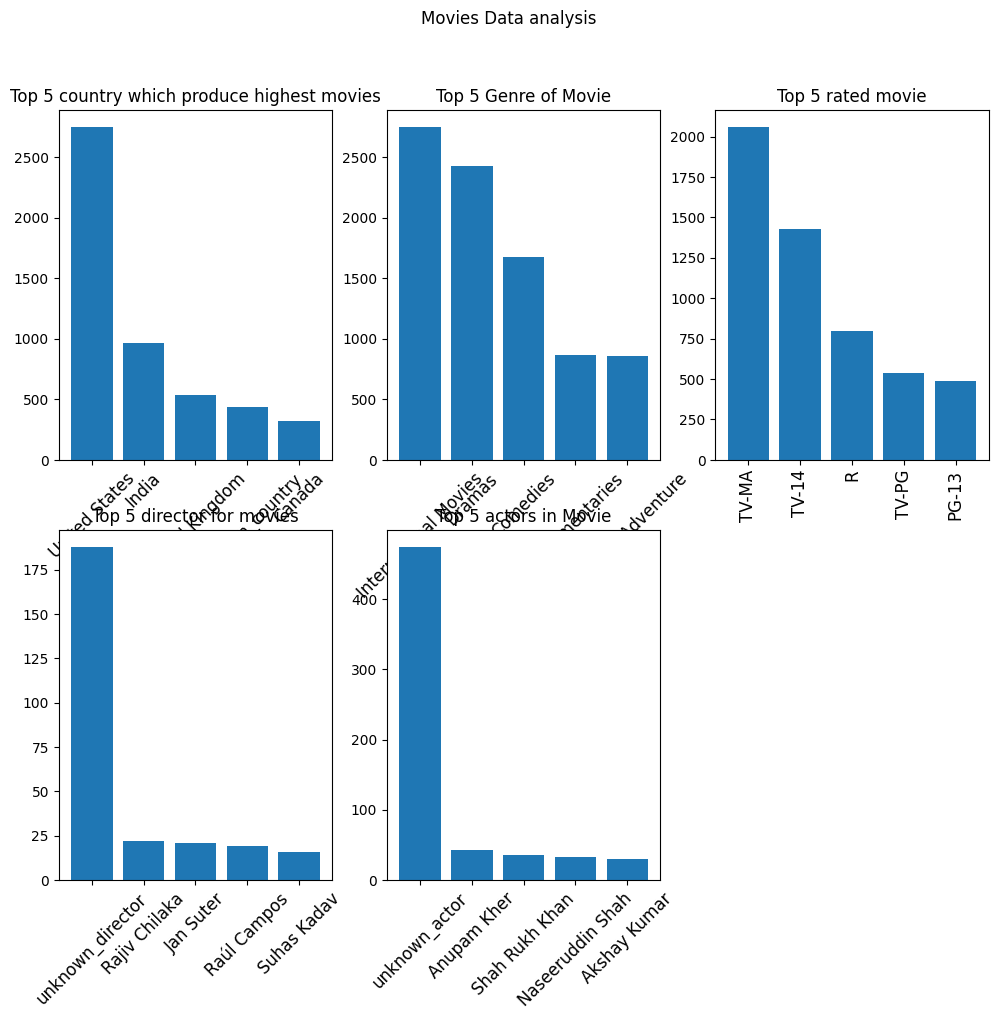

In [67]:
fig=plt.figure(figsize =(12,10))

plt.subplot(2,3,1)

plt.bar(i, j)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 country which produce highest movies")


plt.subplot(2,3,2)
plt.bar(v, r)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 Genre of Movie")

plt.subplot(2,3,3)
plt.bar(o, q)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 rated movie")

plt.subplot(2,3,4)
plt.bar(tr, ru)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 director for movies")

plt.subplot(2,3,5)
plt.bar(t1, r1)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 actors in Movie")

plt.suptitle("Movies Data analysis")
plt.show()

top 5 TV_show analysis

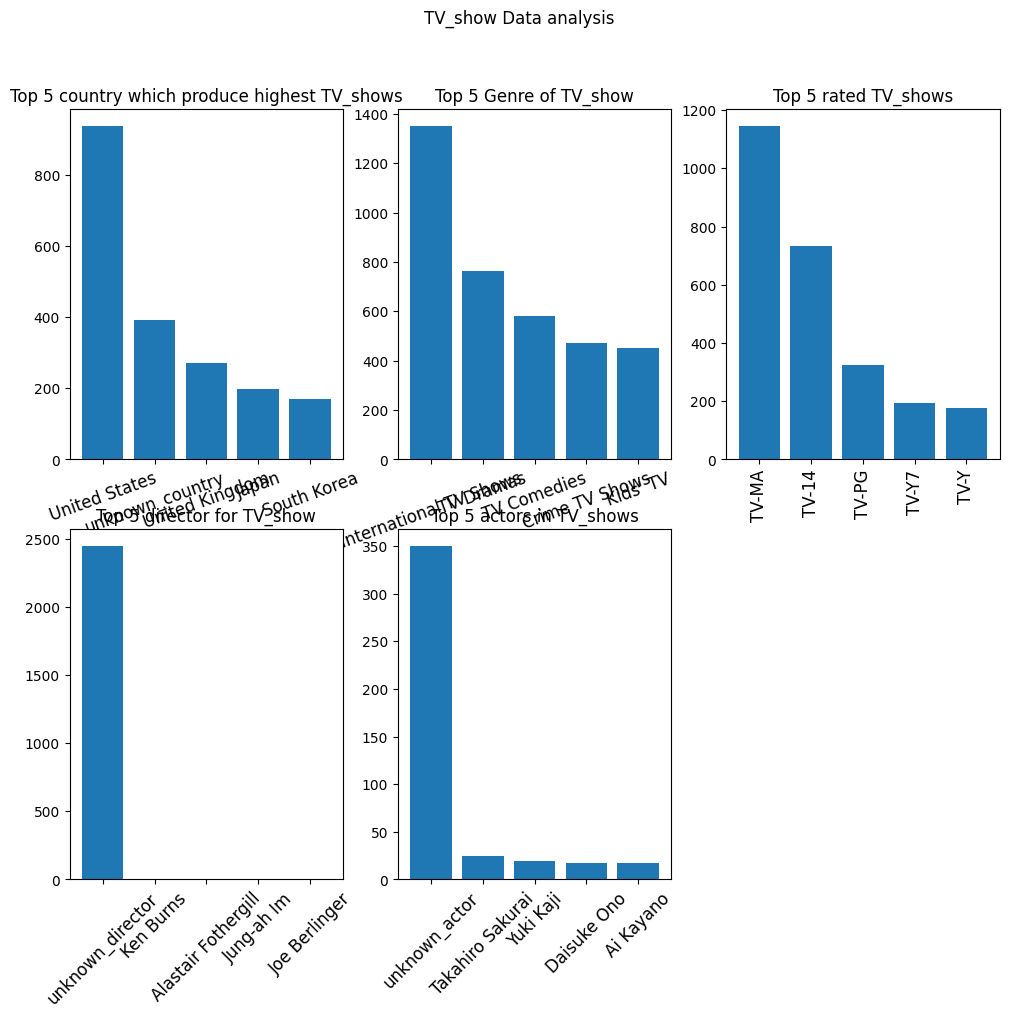

In [68]:
fig=plt.figure(figsize =(12,10))

plt.subplot(2,3,1)

plt.bar(f, p)
plt.xticks(rotation=20,fontsize=12)
plt.title("Top 5 country which produce highest TV_shows")


plt.subplot(2,3,2)
plt.bar(ty, ui)
plt.xticks(rotation=20,fontsize=12)
plt.title("Top 5 Genre of TV_show")

plt.subplot(2,3,3)
plt.bar(x1, x2)
plt.xticks(rotation=90,fontsize=12)
plt.title("Top 5 rated TV_shows")

plt.subplot(2,3,4)
plt.bar(jr, tu)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 director for TV_show")

plt.subplot(2,3,5)
plt.bar(y7, u7)
plt.xticks(rotation=45,fontsize=12)
plt.title("Top 5 actors in TV_shows")

plt.suptitle("TV_show Data analysis")
plt.show()

#**Best time to Release**

Best month for movies added in Netflix?

In [70]:
movie.groupby(movie["date_added"].dt.month_name())["show_id"].nunique().sort_values(ascending=False)

date_added
July         565
April        550
December     547
January      546
October      545
March        529
August       519
September    519
November     498
June         492
May          439
February     382
Name: show_id, dtype: int64

Best month the movies added in Netflix is July

Best weekday for movies added in Netflix?

In [71]:
movie.groupby(movie["date_added"].dt.day_name())["show_id"].nunique().sort_values(ascending=False)

date_added
Friday       1566
Thursday     1053
Wednesday     906
Tuesday       852
Monday        628
Sunday        569
Saturday      557
Name: show_id, dtype: int64

Best weekday added movies added in Netflix is Friday

Best month for TV_show added in Netflix?

In [72]:
tv.groupby(tv["date_added"].dt.month_name())["show_id"].nunique().sort_values(ascending=False)

date_added
December     266
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
May          193
January      192
February     181
Name: show_id, dtype: int64

Best month for TV_show added to netflix is December

Best weekday for TV_show added in Netflix?

In [73]:
tv.groupby(tv["date_added"].dt.day_name())["show_id"].nunique().sort_values(ascending=False)

date_added
Friday       932
Wednesday    382
Tuesday      345
Thursday     343
Saturday     259
Monday       223
Sunday       182
Name: show_id, dtype: int64

Best weekday added TV_Shows added in Netflix is Friday

#**Visual Analysis**

Boxplot of duration of time of movies

In [74]:
movie[["new_dur","n"]]=movie["duration"].str.split(" ",expand=True)

<ipython-input-74-3a7f8876aa9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[["new_dur","n"]]=movie["duration"].str.split(" ",expand=True)
<ipython-input-74-3a7f8876aa9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie[["new_dur","n"]]=movie["duration"].str.split(" ",expand=True)


In [75]:
movie["new_dur"]=movie["new_dur"].astype(int)

<ipython-input-75-0680d734bd0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie["new_dur"]=movie["new_dur"].astype(int)


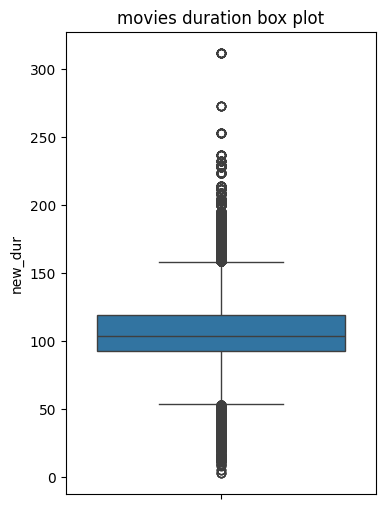

In [76]:
plt.figure(figsize=(4,6))
sns.boxplot(data=movie["new_dur"]
           )
plt.title("movies duration box plot")
plt.show()

Median lenght of the movies is 100

Scatterplot

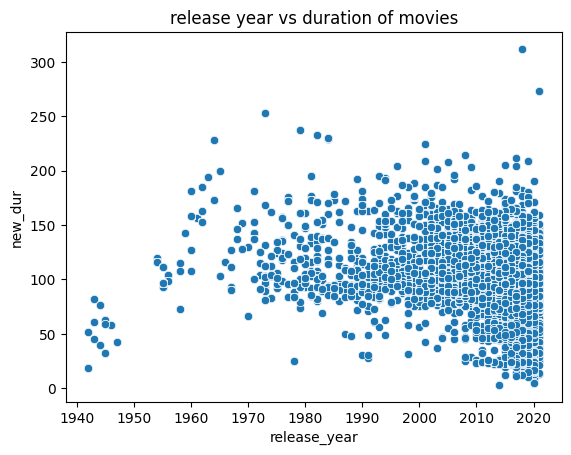

In [77]:
sns.scatterplot(data=movie,
                x="release_year",
               y="new_dur")
plt.title("release year vs duration of movies")
plt.show()

pairplot

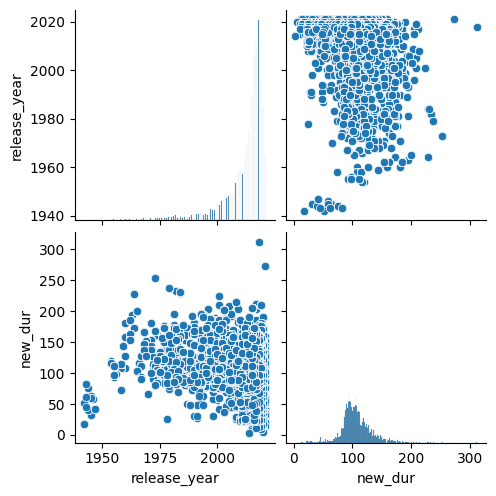

In [78]:
sns.pairplot(data=movie)
plt.show()

Heatmap

In [79]:
movie.corr()

<ipython-input-79-eb03073480ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movie.corr()


,release_year,new_dur
release_year,1.000000,-0.235665
new_dur,-0.235665,1.000000


<ipython-input-80-c4f53743acd4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=movie.corr(),


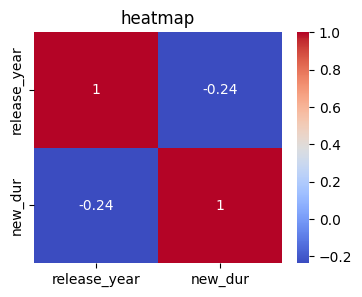

In [80]:
plt.figure(figsize=(4,3))
sns.heatmap(data=movie.corr(),
            annot=True,
           cmap="coolwarm")
plt.title("heatmap")
plt.show()

According to the heatmap and corelation, there is negatibe corelation between release year and duration of time, That means with time the duration of the movies are decreasing

#**Business Insights:**

* Movies are majorly added in Netflix then TV_show

* Mostly Adult type of movie rating is added above 14 and 17 age content

* Majority of the movies are form approx 2008 to 2022 and TV_shows are from approx 2012 to 2022

* United State is the top most producer for both Movies and TV shows

* International and Dramas type of movie are mostly added in Netflix

* International TV shows and Dramas type of TV shows are mostly added in Netflix

* Best time to add movies in Netflix is July and Friday

* Best time to add TV_shows in Netflix is December and Friday

* 50% of the movie duration lies between 90 to 110 minutes

* With time the duration of the Movies are decreasing

#**Business Recommendation:**

* Focus on acquiring on adding more movies, since movies are majorly released compared to TV shows. It would beneficial for Netflix to target audience.

* As Adult rated movies are frequently added above the age of 14 and 17, Netflix can focus on adding and promoting adult oriented content to attract the customer.

* It can observed that International movies and Dramas are popular on Netflix, the platform should continue to invest in acquiring the content from different contries

* The duration of the movie should be between 90 to 110 minutes. Short film movies will be more preferred by the users according to data.

* It can be recommended that Netfilx can focus adding new movies in the month of July, mostly on Friday to maximize the views.

* It can be recommended that Netfilx can focus adding new TV_shows in the month of December, mostly on Friday to maximize the views.